## import necessary Libraries


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
import warnings
import os as os


# Load data from file into array


In [72]:
# variables containing string of filepaths
filepath_data='S013/S013L1.txt'
filepath_blank='S013/BLANKS013.txt'
filepath_std='S013/STD_ARS013.txt'
#load in all necessary data, since background and noise data is needed
data_in = np.genfromtxt(filepath_data, skip_header=6, delimiter='	')
blankARraw = np.genfromtxt(filepath_blank, skip_header = 6, delimiter = '	')
#blankBRraw = np.genfromtxt('BLANK_BR.txt', skip_header = 6, delimiter = '	')
std_corrARraw = np.genfromtxt(filepath_std, skip_header = 6, delimiter = '	')
#std_corrBRraw = np.genfromtxt('S011/std1.txt', skip_header = 6, delimiter = '	')



In [84]:
image1 = np.zeros(len(data_in))
image2 = np.zeros(len(data_in))
wavel = np.zeros(len(data_in))
blankAR = np.zeros(len(data_in))
blankBR = np.zeros(len(data_in))
std_corrAR = np.zeros(len(data_in))
std_corrBR = np.zeros(len(data_in))

## data before correction
for i in range(len(data_in)):
    image1[i] = data_in[i][4]
    wavel[i] = data_in[i][1]
    blankAR[i] = blankARraw[i][-1] ## origin takes last column, but it may be better to average each column
   #blankBR[i] = blankBRraw[i][4] 
    std_corrAR[i] = std_corrARraw[i][-1] - blankARraw[i][-1]
    #std_corrBR[i] = std_corrBRraw[i][4]



# Subtract background and divide reflectivity


In [85]:
nobackground = image1 - blankAR


##this is data with no background, and with the empty sapphire substrate divided out
final = np.divide(nobackground,std_corrAR, out = np.zeros_like(nobackground), where = std_corrAR != 0)
print(std_corrAR[300])
print(wavel[300])
print(blankAR[300])

22.0
247.695
138.0


## Plot raw data (before correction) with a solid line


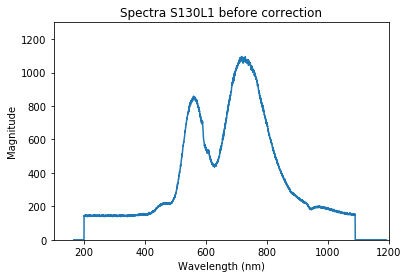

In [86]:
plt.plot(wavel,image1, '-');

# Set axis limits to include origin
plt.xlim(100,1200)
plt.ylim(0,1300);

# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');

# Add legend
## plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Spectra S130L1 before correction');

# Plot cleaned data with a solid line


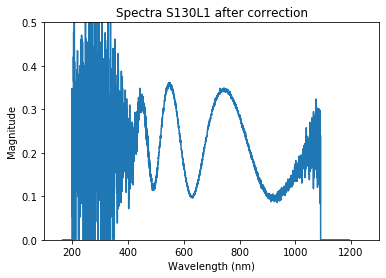

In [87]:
plt.plot(wavel,final, '-');

# Set axis limits to include origin
plt.xlim(100,1300)
plt.ylim(0,.5);

# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');

# Add legend
## plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Spectra S130L1 after correction');

## Declare model fitting function and plot initial parameters


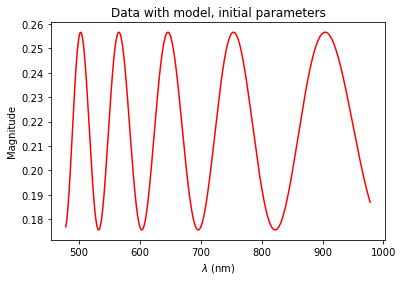

In [88]:

def model(a,b,d,x):
    n = 2.39
    reflectance = a+b*np.cos(d*n/x)
    
    return reflectance
## a and b are constants, d is thickness, x is wavelength, n is refractive index of material (2.39?)

## set initial param. values below based on existing data 2018-2019

ainit = .21609
binit =.04046
dinit = 11887.87457
## index depends on material (2.39 used in existing data 2018-2019)
pinit = [ainit,binit,dinit]
## plot model with inital parameters
## cut off start and end of data
xmodel = wavel [1134:2900]
yfit1 = final[1134:2900] 
plt.plot(xmodel,model(ainit,binit,dinit,xmodel),'r-')

# Label axes and give it a title for notebook (remove it when including the plot in a report)
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Magnitude')
plt.title('Data with model, initial parameters')
plt.show()


## Perform fit and plot over data

/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[-7.26837121e+02  4.04600000e-02  1.18878746e+04]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


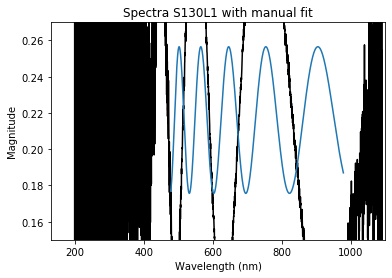

In [91]:
## need to subtract background, and divide out ?noise? (see origin file)



pOpt, pVar = curve_fit(model,xmodel,yfit1, p0 = pinit)

print (pOpt)
print(pVar)
## plot fit on top of data
plt.plot(wavel,final, 'k-');
plt.plot(xmodel, model(pinit[0],pinit[1],pinit[2],xmodel), '-');

# Set axis limits to include origin
plt.xlim(130,1100)
plt.ylim(.15,.27);

# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');

# Add legend
## plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Spectra S130L1 with manual fit');
plt.savefig('fit.pdf')
